<a href="https://colab.research.google.com/github/keshav-b/ML-DL-stuff/blob/master/Segmentation/U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model

U-Net Architecture

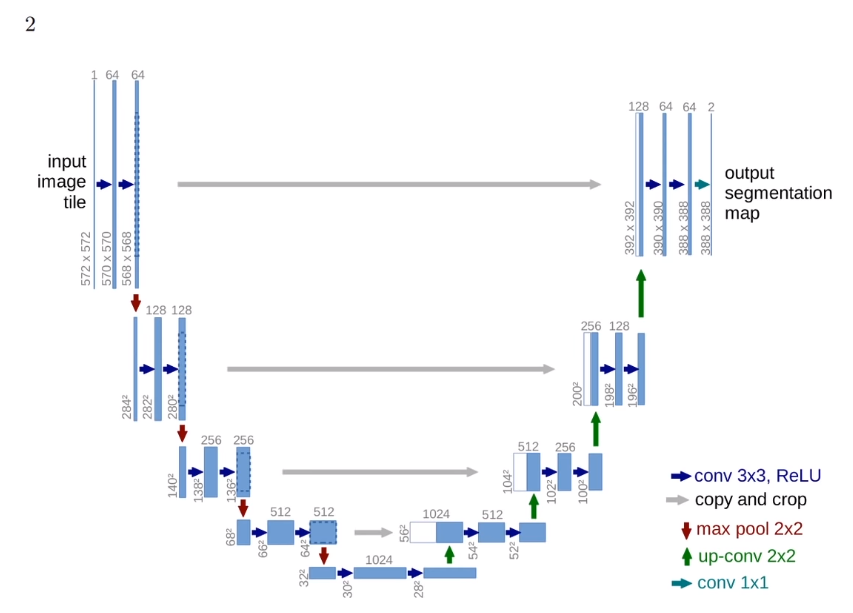

[U-Net Paper](https://arxiv.org/pdf/1505.04597.pdf)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def double_conv(inn, out):
  conv = nn.Sequential(
      nn.Conv2d(inn, out, kernel_size=3),
      nn.ReLU(inplace=True),
      nn.Conv2d(out, out, kernel_size=3),
      nn.ReLU(inplace=True)
  )
  return conv

In [ ]:
def crop(original, target):
  target_size = target.size()[2]
  original_size = original.size()[2]

  delta = original_size - target_size
  delta = delta // 2
  return original[:, :, delta:original_size-delta, delta:original_size-delta]

In [ ]:
class UNet(nn.Module):
  def __init__(self):
    super(UNet, self).__init__()

    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.c_conv_1 = double_conv(1, 64)
    self.c_conv_2 = double_conv(64, 128)
    self.c_conv_3 = double_conv(128, 256)
    self.c_conv_4 = double_conv(256, 512)
    self.c_conv_5 = double_conv(512, 1024)

    self.up_conv_1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.up_conv_2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.up_conv_3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.up_conv_4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)

    self.e_conv_1 = double_conv(1024, 512)
    self.e_conv_2 = double_conv(512, 256)
    self.e_conv_3 = double_conv(256, 128)
    self.e_conv_4 = double_conv(128, 64)

    self.out = nn.Conv2d(64, 2, 2 ,2)

    
  def forward(self, image): # image: [batch_size, channel, height, width]
    # contracting path 
    c1 = self.c_conv_1(image)
    c1_mp = self.max_pool(c1)

    c2 = self.c_conv_2(c1_mp)
    c2_mp = self.max_pool(c2)

    c3 = self.c_conv_3(c2_mp)
    c3_mp = self.max_pool(c3)

    c4 = self.c_conv_4(c3_mp)
    c4_mp = self.max_pool(c4)

    c5 = self.c_conv_5(c4_mp)
    
    # expansive path
    e1 = self.up_conv_1(c5)
    crop1 = crop(c4, e1)
    e1 = self.e_conv_1(torch.cat([e1, crop1], 1))
    
    e2 = self.up_conv_2(e1)
    crop2 = crop(c3, e2)
    e2 = self.e_conv_2(torch.cat([e2, crop2], 1))

    e3 = self.up_conv_3(e2)
    crop3 = crop(c2, e3)
    e3 = self.e_conv_3(torch.cat([e3, crop3], 1))

    e4 = self.up_conv_4(e3)
    crop4 = crop(c1, e4)
    e4 = self.e_conv_4(torch.cat([e4, crop4], 1))

    y = self.out(e4)

    return y

In [ ]:
image = torch.rand((1, 1, 572, 572))
model = UNet()
print(model(image))

tensor([[[[-0.0122, -0.0109, -0.0098,  ..., -0.0101, -0.0139, -0.0124],
          [-0.0133, -0.0129, -0.0094,  ..., -0.0092, -0.0144, -0.0127],
          [-0.0098, -0.0143, -0.0099,  ..., -0.0075, -0.0100, -0.0132],
          ...,
          [-0.0102, -0.0112, -0.0118,  ..., -0.0094, -0.0151, -0.0109],
          [-0.0074, -0.0095, -0.0090,  ..., -0.0127, -0.0132, -0.0138],
          [-0.0126, -0.0094, -0.0119,  ..., -0.0063, -0.0090, -0.0141]]]],
       grad_fn=<MkldnnConvolutionBackward>)


# Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
import json
f = open('/gdrive/My Drive/COCO_Annotation/annotations/stuff_train2017.json',)
train_data = json.load(f)

In [4]:
!unzip '/gdrive/My Drive/COCO_Annotation/annotations/stuff_train2017_pixelmaps.zip'

Streaming output truncated to the last 5000 lines.
  inflating: stuff_train2017_pixelmaps/000000210848.png  
  inflating: stuff_train2017_pixelmaps/000000296540.png  
  inflating: stuff_train2017_pixelmaps/000000270247.png  
  inflating: stuff_train2017_pixelmaps/000000119361.png  
  inflating: stuff_train2017_pixelmaps/000000221842.png  
  inflating: stuff_train2017_pixelmaps/000000478821.png  
  inflating: stuff_train2017_pixelmaps/000000192818.png  
  inflating: stuff_train2017_pixelmaps/000000334320.png  
  inflating: stuff_train2017_pixelmaps/000000558955.png  
  inflating: stuff_train2017_pixelmaps/000000452706.png  
  inflating: stuff_train2017_pixelmaps/000000551581.png  
  inflating: stuff_train2017_pixelmaps/000000340261.png  
  inflating: stuff_train2017_pixelmaps/000000033295.png  
  inflating: stuff_train2017_pixelmaps/000000286253.png  
  inflating: stuff_train2017_pixelmaps/000000216369.png  
  inflating: stuff_train2017_pixelmaps/000000519320.png  
  inflating: stuff_tr